# **Prevendo as Chances de um Ataque Cardíaco**

## Introdução

As doenças cardiovasculares ou cardíacas descrevem uma série de condições que afetam o coração. Uma delas é o ataque cardíaco (enfarte do miocárdio), que é uma emergência médica grave em que o fornecimento de sangue ao coração é repentinamente bloqueado, geralmente por um coágulo sanguíneo. Das estatísticas da OMS, todos os anos, 17,9 milhões de pessoas morrem de doenças cardíacas. O estudo médico afirma que o estilo de vida humano é a principal razão por trás desse problema cardíaco. Além disso, existem muitos fatores-chave que alertam que a pessoa pode ou não ter chance de doença cardíaca.



## Objetivo 

A partir do conjunto de dados, criar um modelo usando deep learning que classifique a doença cardíaca com mais precisão, isso será muito útil para a organizações de saúde e também para os pacientes para prever uma atque cardíaco.

## Dataset 

O dataset possui os seguintes atributos:

* Age: idade
* Sex: sexo (1 = Masculino; 0 = Feminino)
* CP: tipos de dor no peito (4 tipos)
* TRESTBPS: pressão sanguínea em repouso (mm Hg)
* CHOL: colesterol (mg/dl)
* FPS: açúcar no sangue em jeju > 120 mg/dl (1 = verdadeiro; 0 = falso)
* RESTECH: resultados eletrocardiográficos em repouso
* THALACH: frequência cardíaca máxima atingid
* EXANG: angina induzida por exercício (1 = yes; 0 = no)
* OLDPEAK: depressão ST induzida por exercício em relação ao repouso
* SLOPE: a inclinação do segmento ST de pico do exercício
* CA: número de vasos principais (0-3) coloridos por fluorosopia
* THAL: frequência cardíaca máxima alcançada (3 = normal; 6 = defeito corrigido; 7 = defeito reversível)
* TARGET: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco 

Link do dataset: <a href="https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility" target="_blanck">Kaggle- Health care: Heart attack possibility</a>

## 1. Importando as bibliotecas e os dados

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
data = pd.read_csv("heart.csv")
print(f"Número de linhas: {data.shape[0]} e colunas: {data.shape[1]}")
data.head()

Número de linhas: 303 e colunas: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Analisando os dados

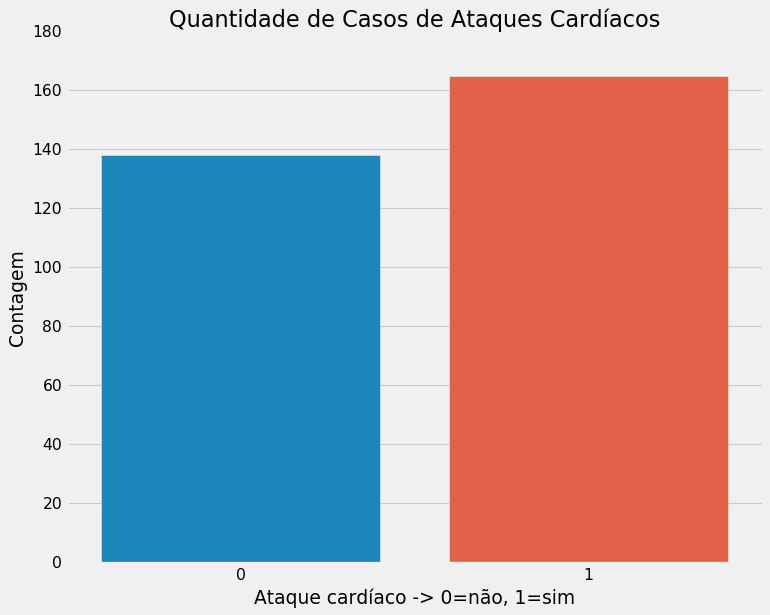

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'target', data = data)
plt.xlabel("Ataque cardíaco -> 0=não,1=sim")
plt.ylabel("Contagem")
plt.title("Quantidade de Casos de Ataques Cardíacos")
plt.show()

* Nos dados, temos um total de 165 casos positivos de ataque cardíaco e de 138 de negativos.

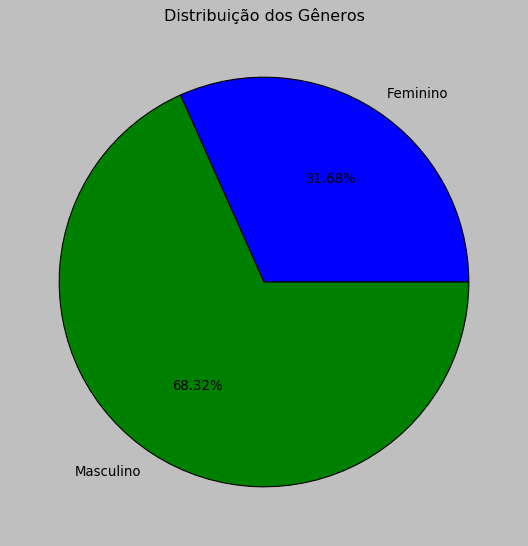

In [11]:
plt.style.use("classic")
plt.figure(figsize=(10, 8))
target = [len(data[data['sex'] == 0]), len(data[data['sex'] == 1])]
labels = ["Feminino", "Masculino"]
plt.pie(x=target, labels=labels, autopct='%1.2f%%')
plt.title("Distribuição dos Gêneros")
plt.show()

* A maior quantidade dos dados são do gênero masculino. 

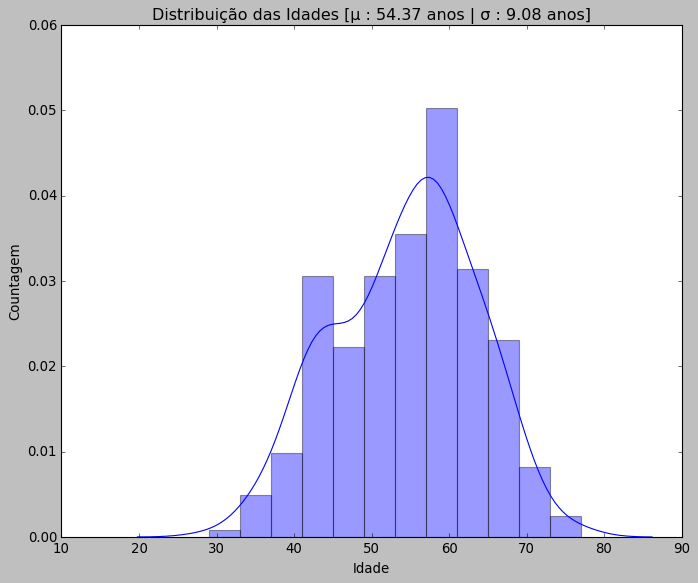

In [13]:
plt.style.use("classic")
plt.figure(figsize=(10, 8))
sns.distplot(data['age'], color='blue')
plt.title(f"Distribuição das Idades [\u03BC : {data['age'].mean():.2f} anos | \u03C3 : {data['age'].std():.2f} anos]")
plt.xlabel("Idade")
plt.ylabel("Countagem")
plt.show()

* A maior quantidade de casos são de pessoas aos 60 anos.

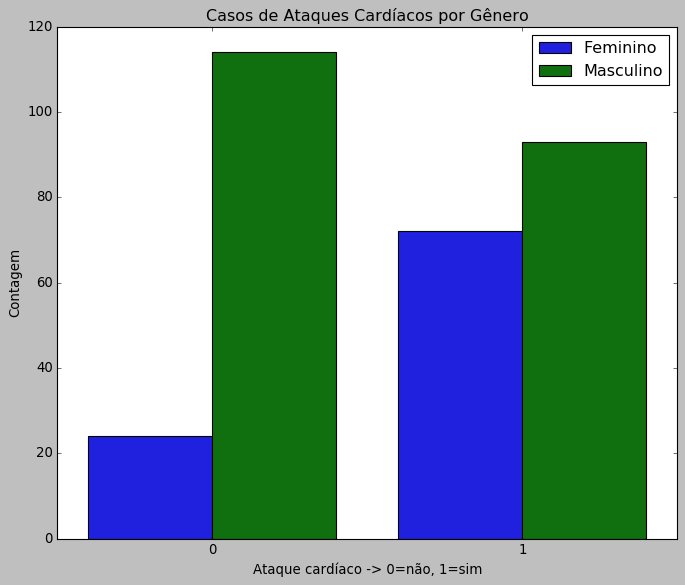

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'target', hue = 'sex', data = data)
plt.xlabel("Ataque cardíaco -> 0=não, 1=sim")
plt.ylabel("Contagem")
plt.title("Casos de Ataques Cardíacos por Gênero")
plt.legend(["Feminino", "Masculino"])
plt.show()

* O gênero masculino sofre mais ataques cardíacos que o feminino.

<Figure size 800x640 with 0 Axes>

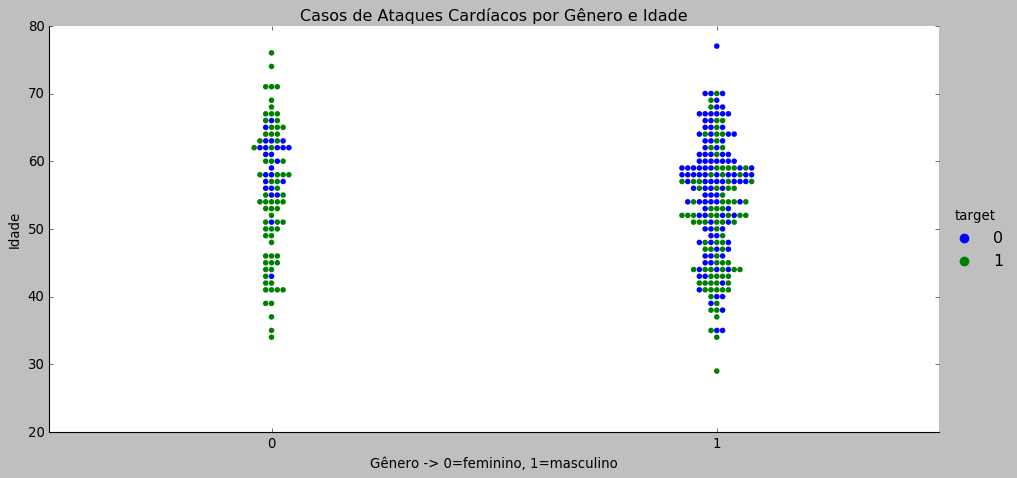

In [18]:
plt.figure(figsize=(10, 8))
sns.catplot(x="sex", y="age", data=data, kind="swarm",hue='target',height=6,aspect=2)
plt.xlabel("Gênero -> 0=feminino, 1=masculino")
plt.ylabel("Idade")
plt.title("Casos de Ataques Cardíacos por Gênero e Idade")
plt.show()

* No gênero masculino, os casos de ataque cardíaco são mais frequentes e se concentram em torno dos 60 anos.

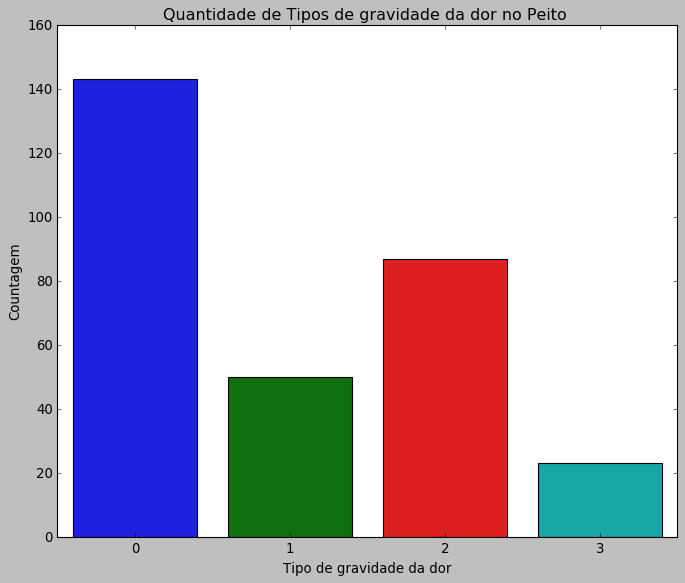

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(data['cp'])
plt.xlabel("Tipo de gravidade da dor")
plt.ylabel("Countagem")
plt.title("Quantidade de Tipos de gravidade da dor no Peito ")
plt.show()

* O tipo de dor no peito mais frequente é a do tipo 0.

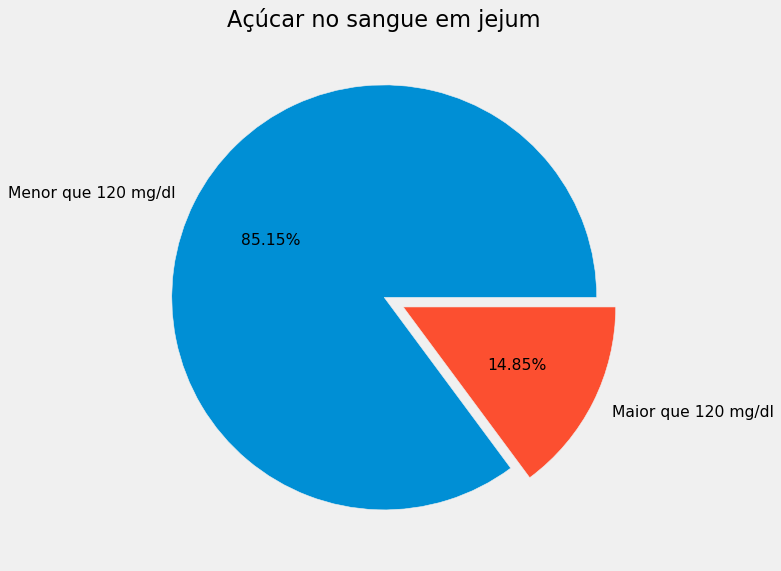

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 8))
target = [len(data[data['fbs'] == 0]), len(data[data['fbs'] == 1])]
labels = ["Menor que 120 mg/dl", "Maior que 120 mg/dl"]
plt.pie(x=target, labels=labels, autopct='%1.2f%%', explode=[0, 0.1])
plt.title("Açúcar no sangue em jejum")
plt.show()

* Mais de 85% dos casos nos dados são de pessoas com nível de açucar menor que 120m/dl.

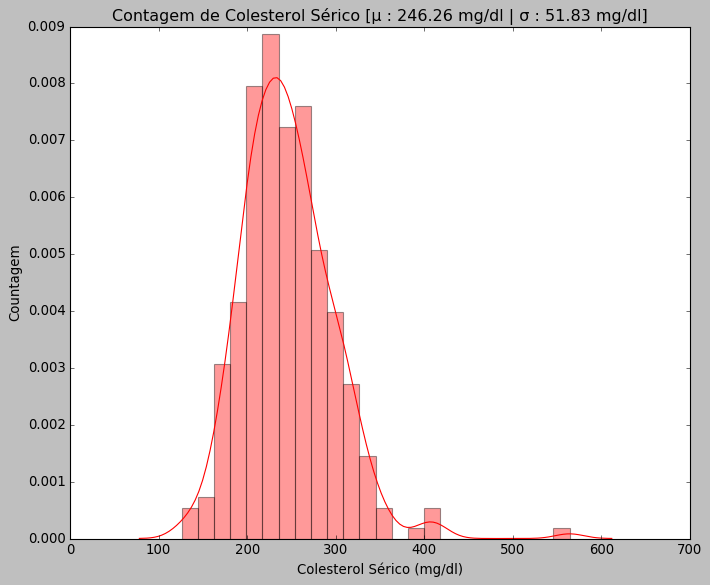

In [26]:
plt.style.use("classic")
plt.figure(figsize=(10, 8))
sns.distplot(data['chol'], color='red')
plt.title(f"Contagem de Colesterol Sérico [\u03BC : {data['chol'].mean():.2f} mg/dl | \u03C3 : {data['chol'].std():.2f} mg/dl]")
plt.xlabel("Colesterol Sérico (mg/dl)")
plt.ylabel("Countagem")
plt.show()

* Colesterol sérico é o colesterol que está na corrente sanguínea. A maior ocorrência nos dados são de níveis entre de 200 a 300 mg/dl.

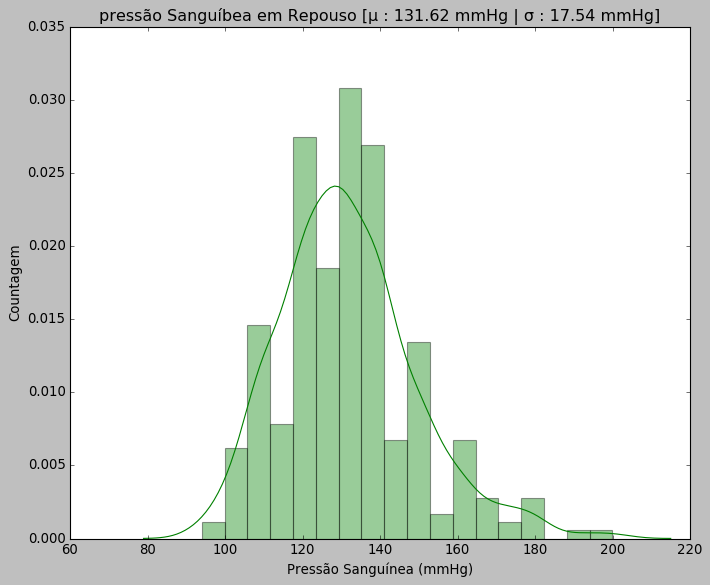

In [27]:
plt.style.use("classic")
plt.figure(figsize=(10, 8))
sns.distplot(data['trestbps'], color='green')
plt.title(f"pressão Sanguíbea em Repouso [\u03BC : {data['trestbps'].mean():.2f} mmHg | \u03C3 : {data['trestbps'].std():.2f} mmHg]")
plt.xlabel("Pressão Sanguínea (mmHg)")
plt.ylabel("Countagem")
plt.show()

* A maior ocorrência nos dados são de pressões sanguíneas entre 120 a 140 mmHg.

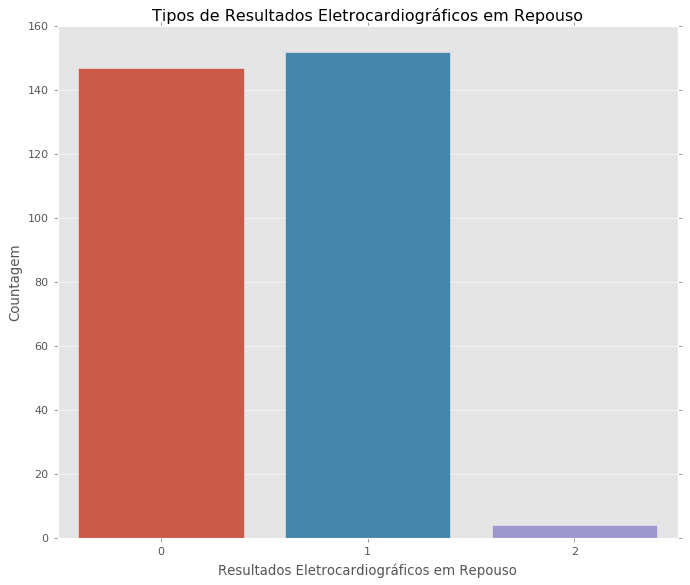

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
sns.countplot(data['restecg'])
plt.xlabel("Resultados Eletrocardiográficos em Repouso")
plt.ylabel("Countagem")
plt.title("Tipos de Resultados Eletrocardiográficos em Repouso")
plt.show()

* Os resultados do tipo 0 e 1 são os predominantes.

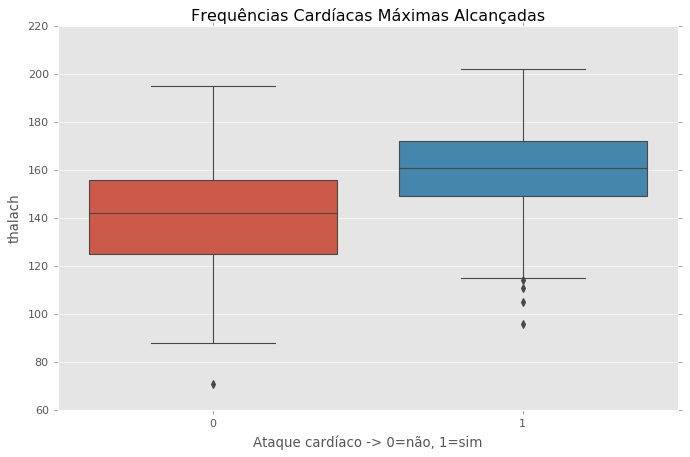

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target',y='thalach', data=data)
plt.title("Frequências Cardíacas Máximas Alcançadas")
plt.xlabel("Ataque cardíaco -> 0=não, 1=sim")
plt.show()

In [32]:
# seleciona os dados correspondentes acasos positivos de ataques cardíacos e negativos 
df_1 = data[data['target'] == 1]
df_0 = data[data['target'] == 0]

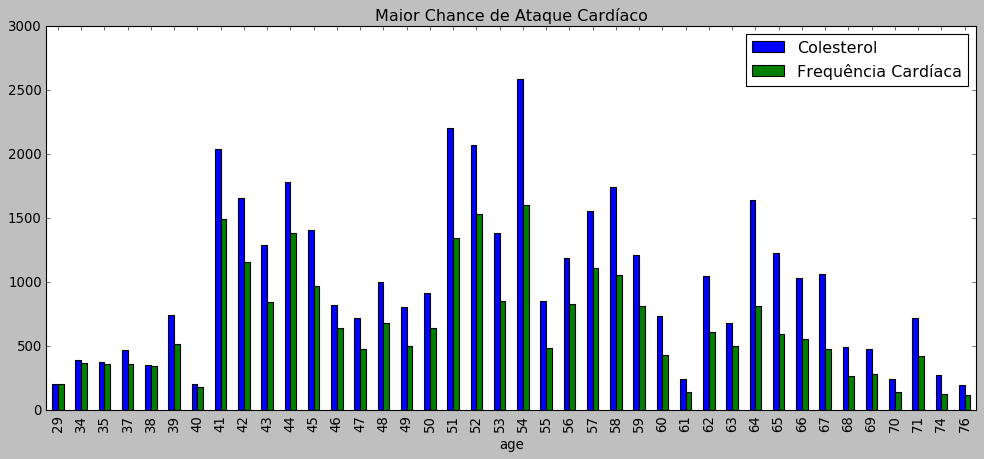

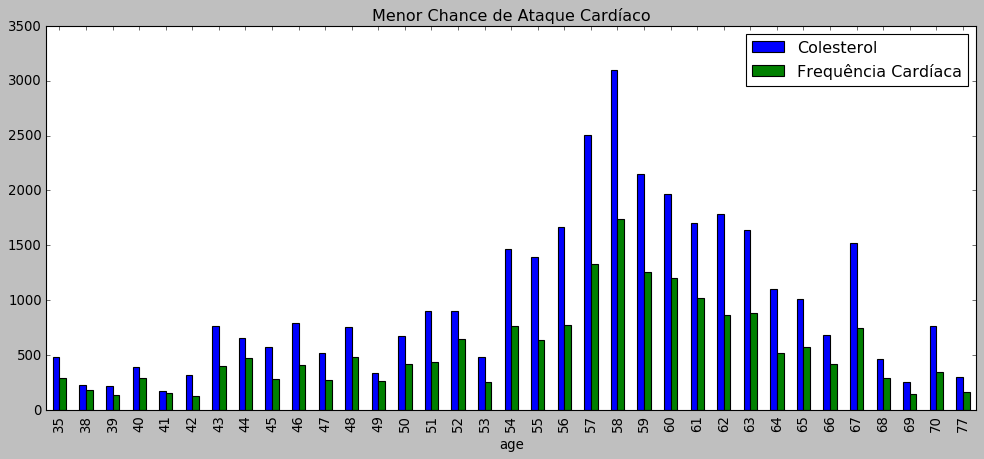

In [35]:
plt.style.use("classic")
ag_df_1 = df_1.groupby(by=['age'])[['chol', 'thalach']].sum()
ag_df_1.plot(kind='bar', figsize=(15, 6), title='Maior Chance de Ataque Cardíaco')
plt.legend(['Colesterol','Frequência Cardíaca'])

ag_df_0 = df_0.groupby(by=['age'])[['chol', 'thalach']].sum()
ag_df_0.plot(kind='bar', figsize=(15, 6), title='Menor Chance de Ataque Cardíaco')
plt.legend(['Colesterol','Frequência Cardíaca'])
plt.show()

* Quem tem maior chance de ter um ataque cardícao possui colesterol e frequencia cardíaca máxima elevada em qualquer idade.

* Quem tem menor chance de ter um ataque cardícao só possui colesterol e frequencia caríaca elevadas em idades por volta dos 58 anos.

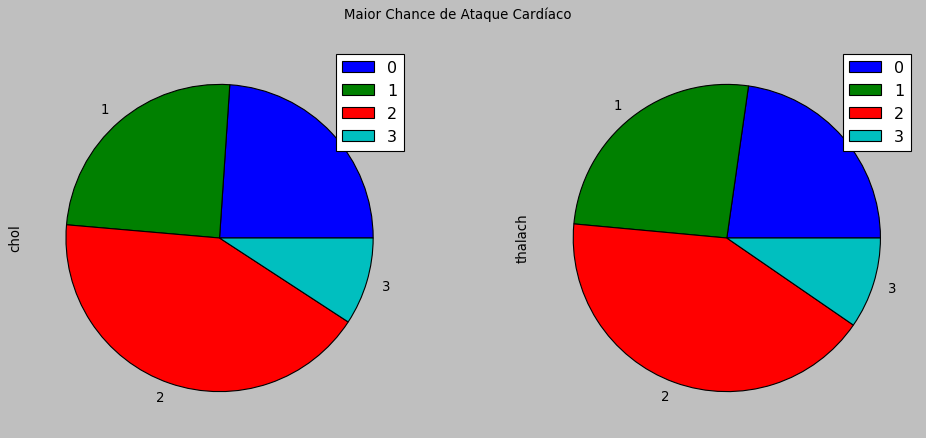

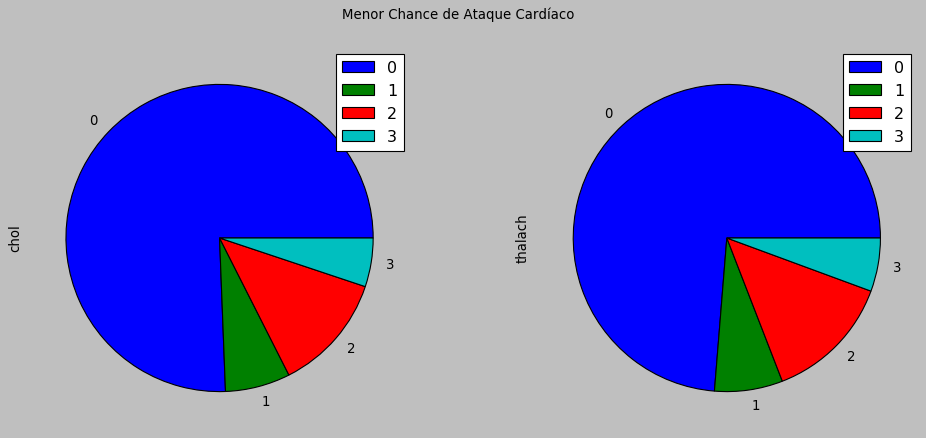

In [36]:
cp_df_1 = df_1.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_1.plot(kind='pie', figsize=(15, 6), subplots=True, title='Maior Chance de Ataque Cardíaco')

cp_df_0 = df_0.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_0.plot(kind='pie', figsize=(15, 6), subplots=True, title='Menor Chance de Ataque Cardíaco')
plt.show()

* Quem tem maior chance de sofrer um ataque cardíaco sente mais dores no peito com gravidade 2 e 1, independentemente dos níveis de colesteros e frequência cardíaca máxima.

* Quem tem menor chance de sofrer um ataque cardíaco sente mais dores no peito com gravidade 0, independentemente dos níveis de colesteros e fequência cardíaca máxima.

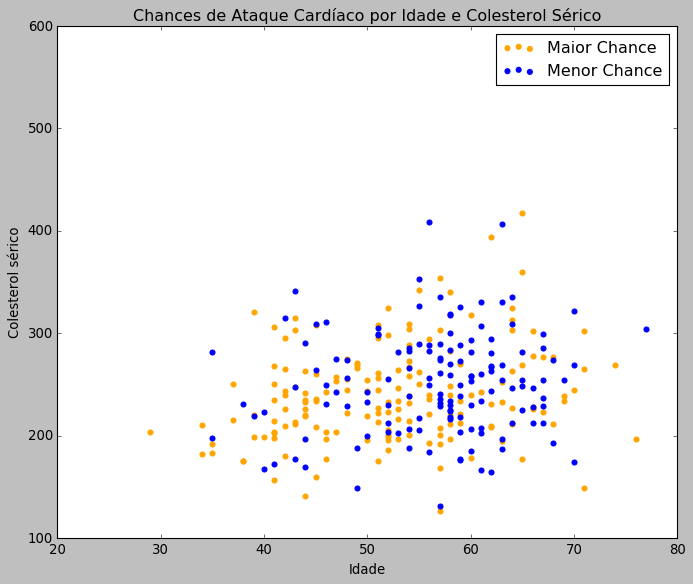

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(df_1['age'], df_1['chol'],color='orange', label='Maior Chance')
plt.scatter(df_0['age'], df_0['chol'],color='blue', label='Menor Chance')
plt.title("Chances de Ataque Cardíaco por Idade e Colesterol Sérico")
plt.xlabel('Idade')
plt.ylabel('Colesterol sérico')
plt.legend()
plt.show()

## 3. Construindo o Modelo de Deep Neural Network (DNN)

In [196]:
# convertendo os dados para vetores numpy
X = np.array(data.drop('target',1))
y = np.array(data['target'])

# divide em conjunto de treino e de teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [197]:
# Padroniza os dados
X1_train = preprocessing.scale(X_train)
X1_test = preprocessing.scale(X_test)

# Converte um classe de vetor em uma matriz de classe binária 
y1_train = to_categorical(y_train)
y1_test = to_categorical(y_test)

In [198]:
# cria um modelo de deep neural network
model = Sequential()

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))


In [199]:
# otimizador para diminuir o erro do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compila o modelo
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [200]:
BATCH_SIZE = 128
EPOCHS = 200

# ajusta (fit) o modelo com os dados de treino
history = model.fit(X1_train,y1_train,shuffle=True,batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/200
2/2 [==============================] - 1s 7ms/step - loss: 0.7102 - accuracy: 0.4711
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.7043 - accuracy: 0.5207
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5579
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6985 - accuracy: 0.5661
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5455
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5785
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6240
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6818
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6860
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6860
Epoch 11/200
2/2 [==========

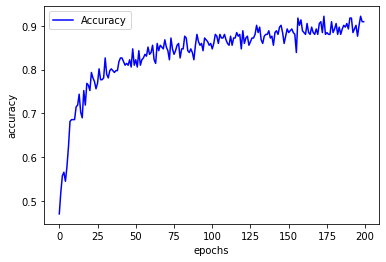

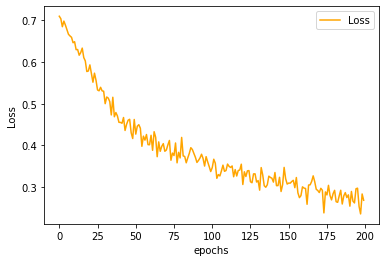

In [201]:
# Gráfico da acurácia nos dados de treino
plt.plot(history.history['accuracy'],color='blue',label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# gráfico da função de perda(errro) do modelo
plt.plot(history.history['loss'],color='orange',label="Loss")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* O Modelo obteve uma acurácia maior que 90%  e uma perda (erro) menor que 27% para os dados de treino.

## 4. Avaliando o Modelo

In [202]:
# calcula a acurácia nos dados de teste
score = model.evaluate(X1_test,y1_test)
print("\nAccuracy:", score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9016

Accuracy: 0.9016393423080444


* nosso modelo e DNN consegui uma acurácia de 90% para os dados de teste.

In [203]:
# faz uma previsão usando os dados de treino
y_pred = model.predict(X1_test)

threshold=0.5 # liminar

# se o valor é maior que o limiar, é classificado como 1; senão é 0
y_pred_= np.where(y_pred>threshold,1.,0.)

# transforma em um vetor unidimensional
y2_pred = y_pred_.flatten()
y2_test = y1_test.flatten()

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        61
         1.0       0.90      0.90      0.90        61

    accuracy                           0.90       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.90      0.90      0.90       122



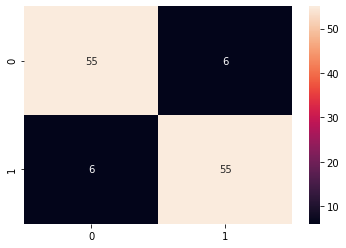

In [204]:
# matriz de confusão para avaliar as classificações feitas pelo modelo
cm=confusion_matrix(y2_test,y2_pred)
sns.heatmap(cm,annot=True)

print(classification_report(y2_test,y2_pred))

* Conseguimos uma precisão de 90% na classificação dos dados de teste.

* Dos 122 casos de teste, 110 foram classificados corretamente entre maior e menor risoc de ataque cardíaco, enquanto que apenas 12 casos forem classificados erroneamente.
 

## 5. Conclusão

**Usando as técnicas de redes neurais profundas (deep neural network), conseguimos criar um modelo com 90% de precisão em classificar casos de maior e de menor chance de ataque cardíaco em pacientes.**